In [1]:
# !pip install opencv-contrib-python

In [2]:
# !pip install imutils

In [3]:
# !pip install pytesseract

In [1]:
import cv2
import imutils
import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'

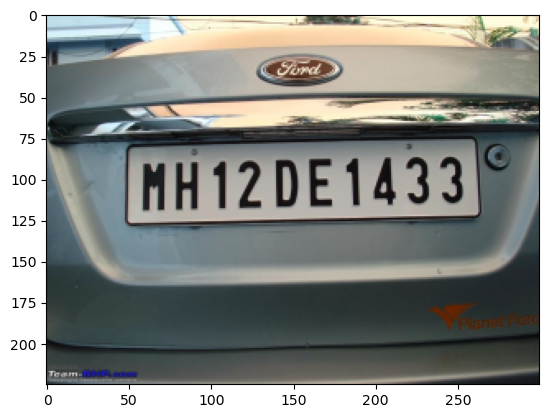

In [8]:
# Taking in our image input and resizing its width to 300 pixels

import matplotlib.pyplot as plt

image = cv2.imread('test.jpg')
image = imutils.resize(image, width=300 )
# print(image)
# cv2.imshow("original image", image)
# cv2.waitKey(0)
plt.imshow(image)

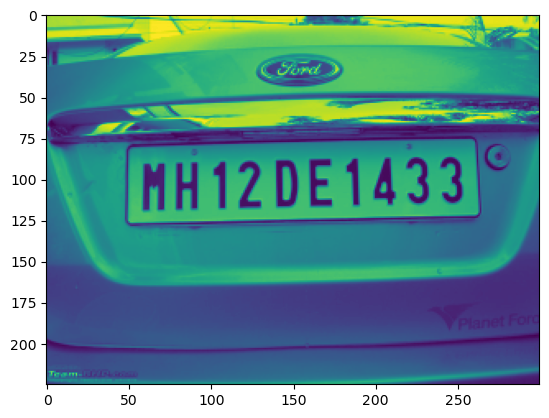

In [11]:
# Converting the input image to greyscale

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imshow("greyed image", gray_image)
# cv2.waitKey(0)
plt.imshow(gray_image)

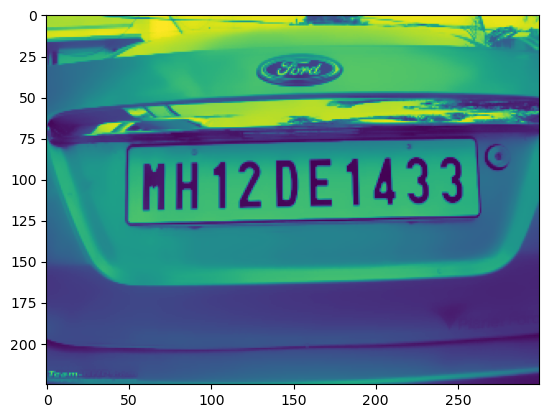

In [12]:
# Reducing the noise in the greyscale image

gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17) 
# cv2.imshow("smoothened image", gray_image)
# cv2.waitKey(0)
plt.imshow(gray_image)

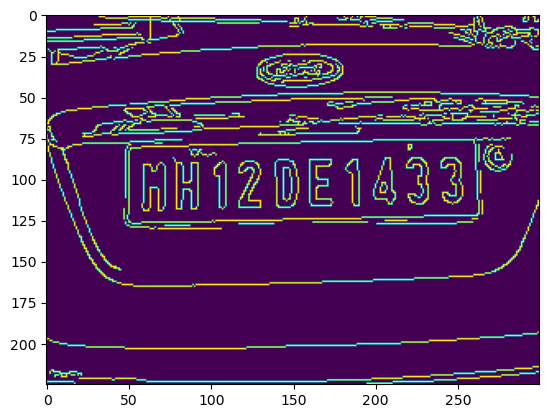

In [13]:
# Detecting the edges of the smoothened image

edged = cv2.Canny(gray_image, 30, 200) 
# cv2.imshow("edged image", edged)
# cv2.waitKey(0)
plt.imshow(edged)

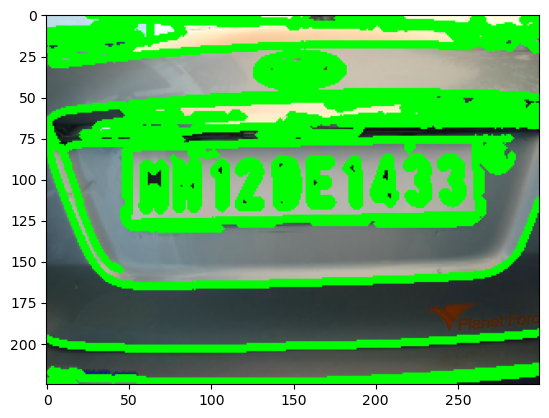

In [14]:
# Finding the contours from the edged image

cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
# cv2.imshow("contours",image1)
# cv2.waitKey(0)
plt.imshow(image1)

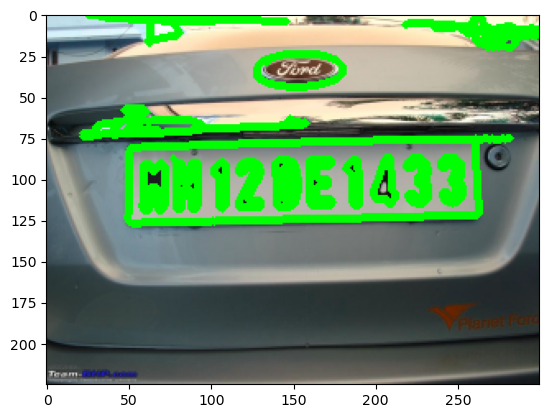

In [15]:
# Sorting the identified contours

cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
# cv2.imshow("Top 30 contours",image2)
# cv2.waitKey(0)
plt.imshow(image2)

In [16]:
# Finding the contour with four sides

i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
            screenCnt = approx
            # Cropping the rectangular part identified as license plate
            x,y,w,h = cv2.boundingRect(c) 
            new_img=image[y:y+h,x:x+w]
            cv2.imwrite('./'+str(i)+'.png',new_img)
            i+=1
            break

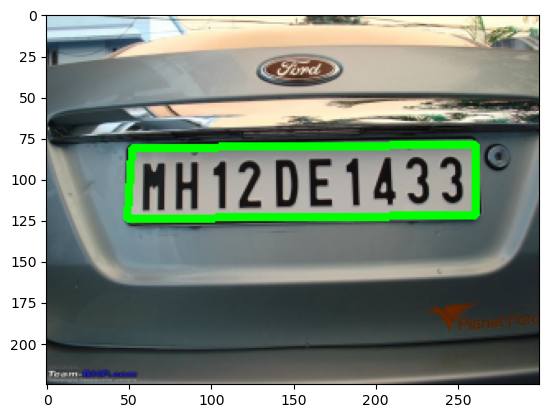

In [17]:
# Drawing the selected contour on the original image

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
# cv2.imshow("image with detected license plate", image)
# cv2.waitKey(0)
plt.imshow(image)

Number plate is: MH12DE1433



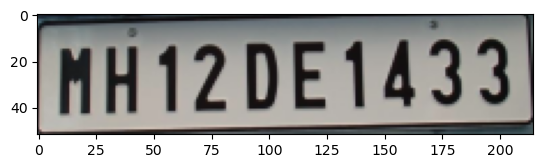

In [22]:
# Extracting text from the image of the cropped license plate

Cropped_loc = './7.png'
# cv2.imshow("cropped", cv2.imread(Cropped_loc))
plt.imshow(cv2.imread(Cropped_loc))
plate = pytesseract.image_to_string(Cropped_loc, lang='eng')
print("Number plate is:", plate)
# cv2.waitKey(0)
# cv2.destroyAllWindows()